## Matching labels
This script will compare two labelled images and convert the assigned labels in one image to resemble the labels in the first image.

In [13]:
import os
import biapolutils
from skimage import io, measure, filters
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

### Load data
First, we load the example blobs image and threshold it to create a label map. 

In [11]:
blobs = biapolutils.data.blobs()

<IPython.core.display.Javascript object>


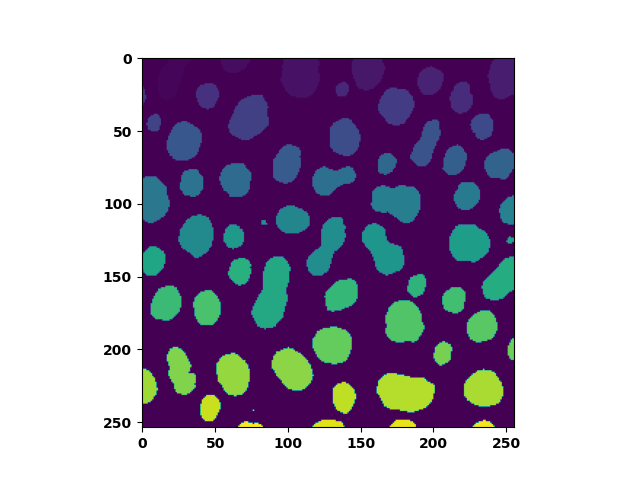

In [12]:
threshold = 128
imageA = (blobs > threshold).astype(np.uint8)
imageA_labelled = measure.label(imageA)

plt.imshow(imageA_labelled)

Let's create a second version of this image in which we shuffle the labels:

In [54]:
label_shuffle = np.arange(1, imageA_labelled.max()+1, 1)
np.random.shuffle(label_shuffle)
label_shuffle = np.append(np.asarray([0]), label_shuffle)  # append 0 at start of array - we don't want to shuffle background

imageB_labelled = label_shuffle[imageA_labelled]

Both images are not identical!

<IPython.core.display.Javascript object>


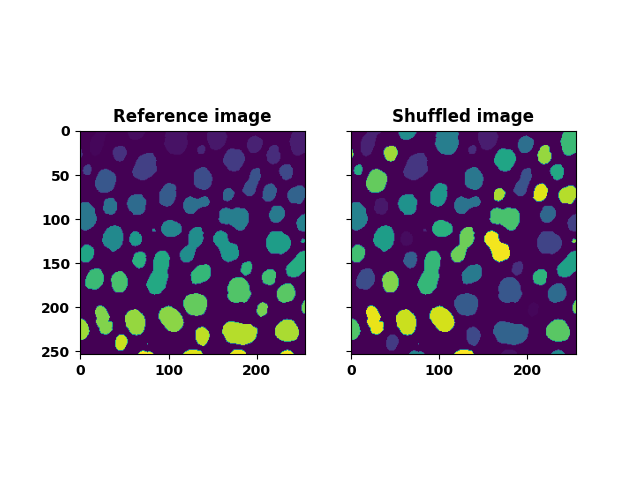

Number of labels in imageA: 63
Number of labels in imageB: 63


In [55]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
axes[0].imshow(imageA_labelled)
axes[0].set_title('Reference image')
axes[1].imshow(imageB_labelled)
axes[1].set_title('Shuffled image')

print(f'Number of labels in imageA: {imageA_labelled.max()}')
print(f'Number of labels in imageB: {imageB_labelled.max()}')

Match labels and track time

In [56]:
t0 = datetime.now()
output = biapolutils.label.match_labels(imageA_labelled, imageB_labelled)
t1 = datetime.now()
print(f'Took {(t1-t0).seconds*1000} ms')

Took 0 ms


Visualize

<IPython.core.display.Javascript object>


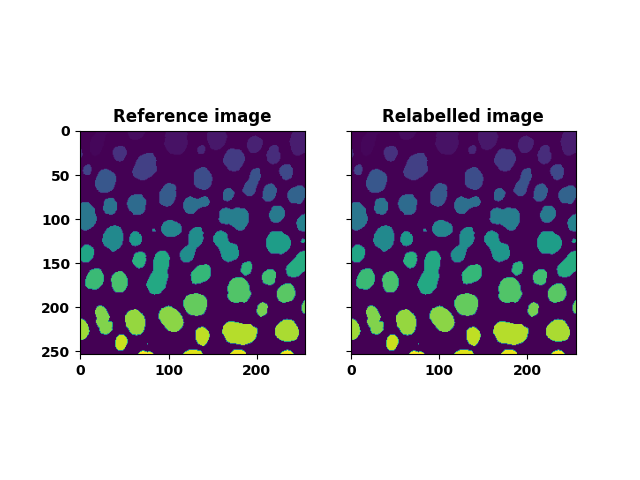

Text(0.5, 1.0, 'Relabelled image')

In [57]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
axes[0].imshow(imageA_labelled)
axes[0].set_title('Reference image')
axes[1].imshow(output)
axes[1].set_title('Relabelled image')